In [1]:
import geopandas 
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import shapely.geometry as sgeom

%matplotlib inline

In [2]:
track_line_gdf = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_lin.shp')
cone_gdf       = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_pgn.shp')
points_gdf     = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_pts.shp')
ww_gdf         = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_ww_wwlin.shp')

init_radii_gdf = geopandas.read_file('laura_shape_files/al132020_fcst_011/al132020_2020082215_initialradii.shp')
fcst_radii_gdf = geopandas.read_file('laura_shape_files/al132020_fcst_011/al132020_2020082215_forecastradii.shp')

best_track_points_gdf = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_pts.shp')
best_track_line_gdf   = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_lin.shp')
best_track_radii_gdf  = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_radii.shp')
best_track_swath_gdf  = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_windswath.shp')

wsp_34_gdf = geopandas.read_file('laura_shape_files/wsp_120hrhalfDeg_latest/2021071912_wsp34knt120hr_halfDeg.shp')
wsp_50_gdf = geopandas.read_file('laura_shape_files/wsp_120hrhalfDeg_latest/2021071912_wsp50knt120hr_halfDeg.shp')
wsp_64_gdf = geopandas.read_file('laura_shape_files/wsp_120hrhalfDeg_latest/2021071912_wsp64knt120hr_halfDeg.shp')

breakingpoints_2021 = geopandas.read_file('breakpoints_2021/Breakpoints_2021.shp')


In [3]:
breakingpoints_rd_2021 = breakingpoints_2021.loc[(17  < breakingpoints_2021['Latitude'])  & 
                                                 (20  > breakingpoints_2021['Latitude'])  &
                                                 (-67 > breakingpoints_2021['Longitude']) &
                                                 (-72 < breakingpoints_2021['Longitude'])
                                                 ]
breakingpoints_rd_2021_reordered = breakingpoints_rd_2021.reindex([299, 298, 297, 522, 296, 528, 
                                                                   295, 294, 307, 306, 305, 304])
breakingpoints_rd_2021_reordered.reset_index()

,index,FID_,Shape__,OBJECTID_1,OBJECTID,STNM,Name,Latitude,Longitude,State,Country,geometry
0,299,299,Point,314,315,400600,Southern Border Dom Rep/Haiti,18.00,-71.70,None,HAITI,POINT (-71.70000 18.00000)
1,298,298,Point,313,314,400500,Cabo Beata,17.58,-71.46,None,DOMINICAN REPUBLIC,POINT (-71.46000 17.58000)
2,297,297,Point,312,313,400400,Barahona,18.22,-71.12,None,DOMINICAN REPUBLIC,POINT (-71.12000 18.22000)
3,522,522,Point,0,0,0,Punta Palenque,18.23,-70.16,None,None,POINT (-70.16000 18.23000)
4,296,296,Point,311,312,400300,Santo Domingo,18.50,-69.95,None,DOMINICAN REPUBLIC,POINT (-69.95000 18.50000)
5,528,528,Point,0,0,0,Cabo Caucedo,18.40,-69.64,None,None,POINT (-69.64000 18.40000)
6,295,295,Point,310,311,400200,Isla Saona,18.15,-68.68,None,DOMINICAN REPUBLIC,POINT (-68.68000 18.15000)
7,294,294,Point,309,310,400100,Cabo Engano,18.59,-68.31,None,DOMINICAN REPUBLIC,POINT (-68.31000 18.59000)
8,307,307,Point,322,323,401400,Samana,19.23,-69.33,None,DOMINICAN REPUBLIC,POINT (-69.33000 19.23000)
9,306,306,Point,321,322,401300,Cabo Frances Viejo,19.62,-69.90,None,DOMINICAN REPUBLIC,POINT (-69.90000 19.62000)


In [4]:
DIR      =  '../shape_files'
Features = ['ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp',
            'ne_10m_land/ne_10m_land.shp', 
            'ne_10m_ocean/ne_10m_ocean.shp',
            'ne_10m_coastline/ne_10m_coastline.shp',
            'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp']

states_provinces_gdf = geopandas.read_file(f'{DIR}/{Features[0]}')
land_gdf             = geopandas.read_file(f'{DIR}/{Features[1]}')
ocean_gdf            = geopandas.read_file(f'{DIR}/{Features[2]}')
coastline_gdf        = geopandas.read_file(f'{DIR}/{Features[3]}')
countries_gdf        = geopandas.read_file(f'{DIR}/{Features[4]}')

In [5]:
#######Frezing Level
# freezing_temperature = 0 * units.degC
# zero_temp_index = np.abs(d['temperature'] - freezing_temperature).argmin()
# freezing_level  = d['height'][zero_temp_index]
# closest_to_zero = np.abs(d['temperature'] - freezing_temperature)[zero_temp_index]
# if closest_to_zero.m > 1 or closest_to_zero.m < -1:
#     freezing_level = 9999 * units.degC

In [58]:
from shapely.geometry import LineString


p_ext = np.array(np.array(countries_gdf.loc[countries_gdf['ADMIN'] == 
         'Dominican Republic']['geometry'])[0][0].exterior.coords[:])

p_bkp = np.array(list(breakingpoints_rd_2021_reordered['geometry'])[0].coords[0])

# line = LineString(p)
# line

np.abs(p_ext - p_bkp).argmin()
p_ext[np.abs(p_ext[0] - p_bkp[0]).argmin()]







array([-71.75743568,  19.71010977])

In [62]:
type()

shapely.geometry.point.Point

In [64]:
poly = list(countries_gdf.loc[countries_gdf['ADMIN'] == 
         'Dominican Republic']['geometry'])[0][0]
point = list(breakingpoints_rd_2021_reordered['geometry'])[0]

poly.distance(point)

0.0023501872136789943

In [6]:
map_crs = ccrs.PlateCarree()
data_crs= ccrs.PlateCarree()

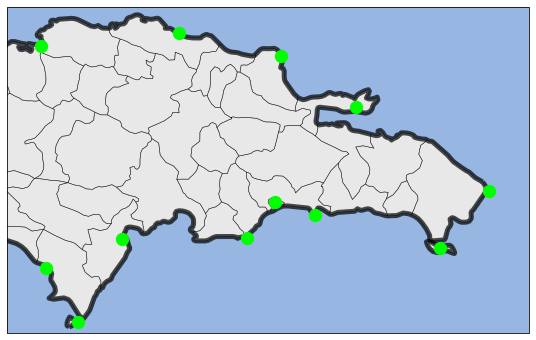

In [8]:
fig = plt.figure(figsize=(10, 6))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-72, -68, 17.5, 20])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

# ax.add_geometries(ocean_gdf['geometry'], crs=data_crs, facecolor='lightblue',
#                  edgecolor='none')
ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5)
ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=5, alpha=0.7)


sc = ax.scatter(breakingpoints_rd_2021['Longitude'], breakingpoints_rd_2021['Latitude'],transform=data_crs,
                zorder=10, color = 'lime', s=150)

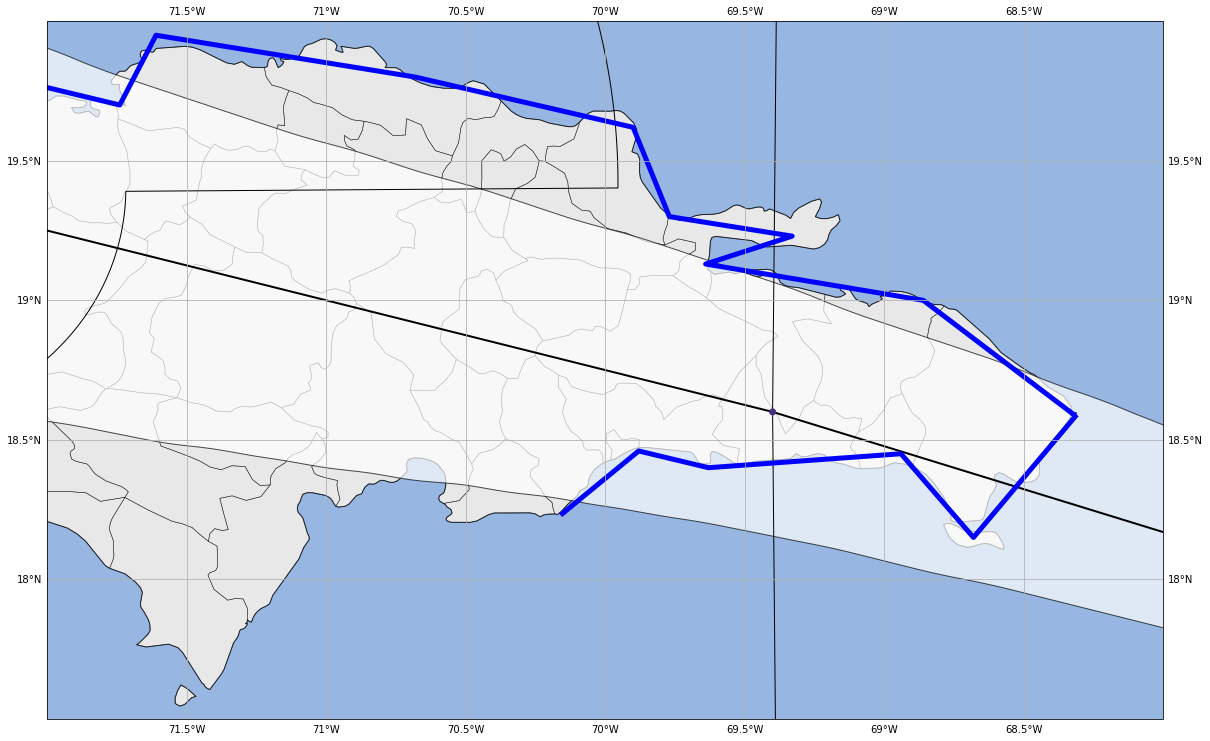

In [75]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-100, -50, 10, 40])
ax.set_extent([-72, -68, 17.5, 20])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

# ax.add_geometries(ocean_gdf['geometry'], crs=data_crs, facecolor='lightblue',
#                  edgecolor='none')
ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5)
ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1, alpha=0.7)

ax.add_geometries(cone_gdf['geometry'], crs=data_crs, facecolor='white',
                 edgecolor='black', linewidth=1, alpha=0.7)
ax.add_geometries(track_line_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2)
sc = ax.scatter(points_gdf['LON'], points_gdf['LAT'],transform=data_crs,
                zorder=10, c=points_gdf['MAXWIND'])
ax.add_geometries(init_radii_gdf['geometry'], crs=data_crs, facecolor='brown',
                 edgecolor='none', linewidth=0.1, alpha=0.5)
ax.add_geometries(fcst_radii_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1)

ww_colors = {'TWA': 'yellow',
             'HWA': 'pink',
             'TWR': 'blue',
             'HWR': 'tab:red'}

for ww_type in ww_colors.keys():
    ww_subset = ww_gdf[ww_gdf['TCWW']==ww_type]
    ax.add_geometries(ww_subset['geometry'], facecolor='none',
                     edgecolor=ww_colors[ww_type], crs=data_crs,
                     linewidth=5)
#plt.colorbar(sc)

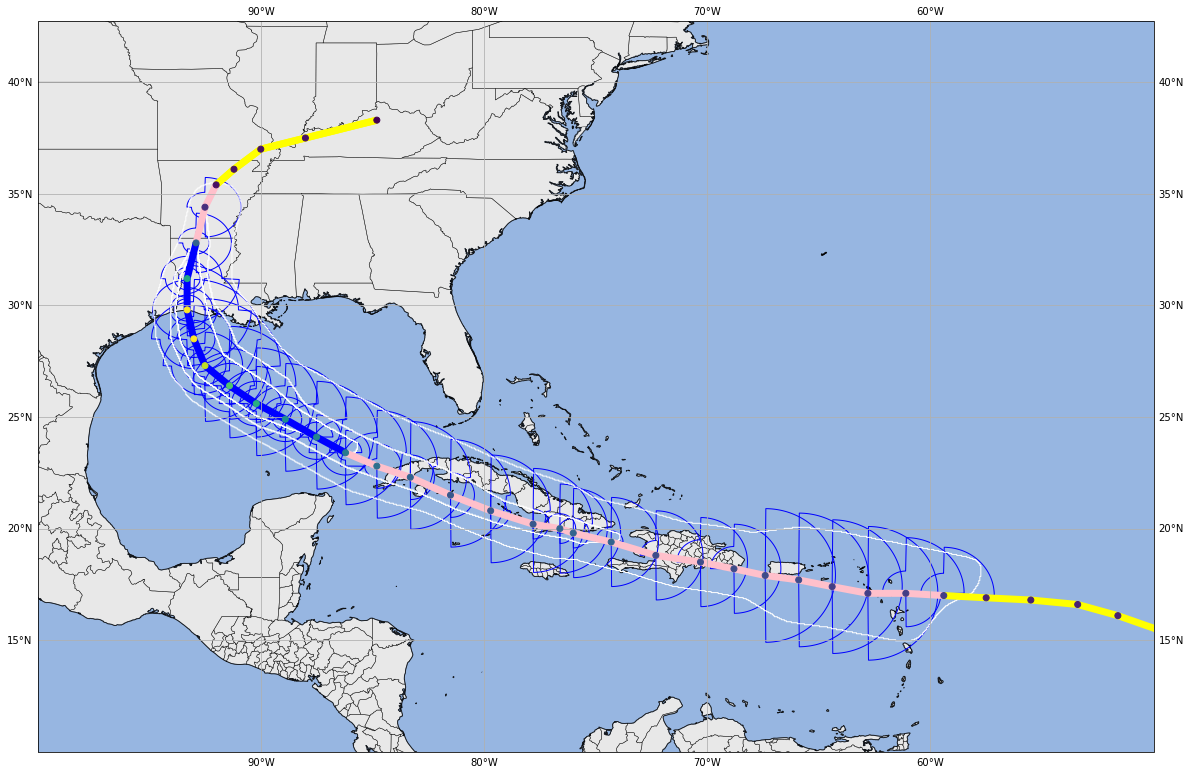

In [10]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-100, -50, 10, 40])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

# ax.add_geometries(ocean_gdf['geometry'], crs=data_crs, facecolor='lightblue',
#                  edgecolor='none')
ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5)
ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1, alpha=0.7)


sc_2 = ax.scatter(best_track_points_gdf['LON'], best_track_points_gdf['LAT'],
                  transform=data_crs, zorder=10, c=best_track_points_gdf['INTENSITY'])
# ax.add_geometries(best_track_line_gdf['geometry'], crs=data_crs, facecolor='none',
#                   edgecolor='black', linewidth=2)
ax.add_geometries(best_track_radii_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='blue')
ax.add_geometries(best_track_swath_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='white')

btl_colors ={'TD': 'yellow',
             'TS': 'pink',
             'HU': 'blue',
             'MH': 'tab:red'}

for btl_type in btl_colors.keys():
    btl_subset = best_track_line_gdf[best_track_line_gdf['STORMTYPE']== btl_type]
    ax.add_geometries(btl_subset['geometry'], facecolor='none',
                     edgecolor=btl_colors[btl_type], crs=data_crs,
                     linewidth=7, alpha = 1)

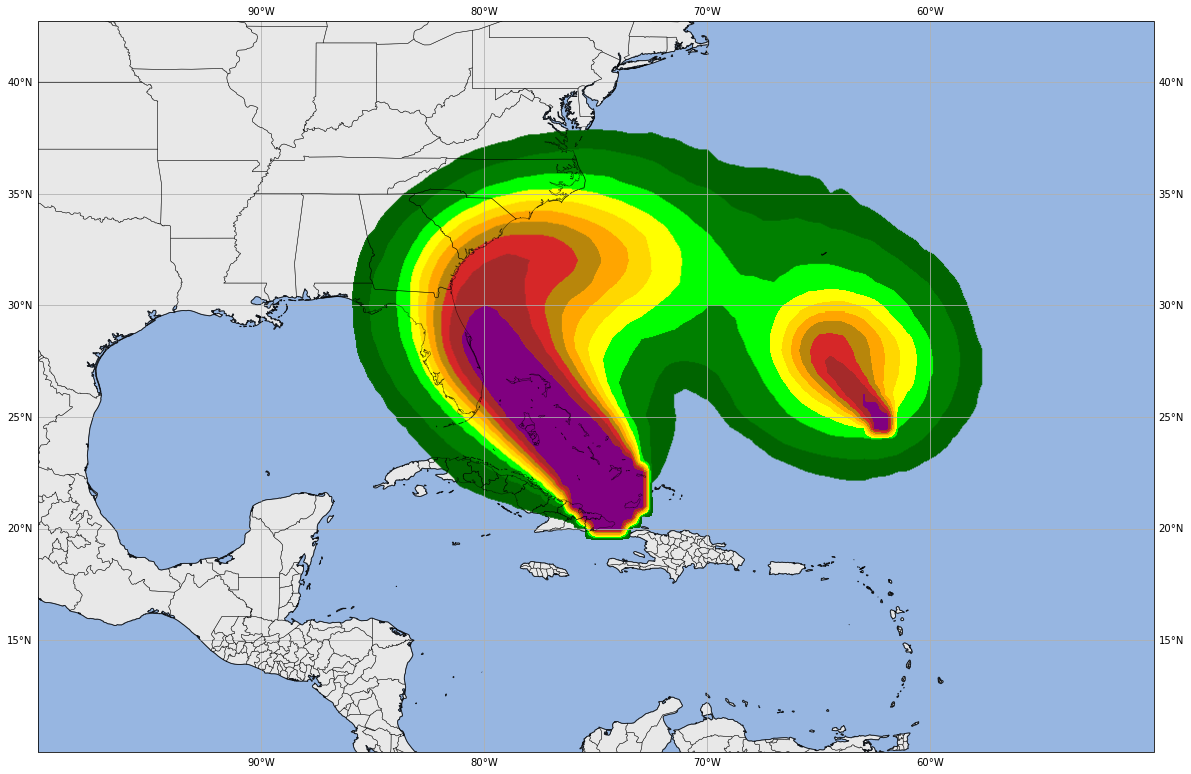

In [11]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-100, -50, 10, 40])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

# ax.add_geometries(ocean_gdf['geometry'], crs=data_crs, facecolor='lightblue',
#                  edgecolor='none')
ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5, zorder = -1)
ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7, zorder = 10)
ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1, alpha=0.7)

#wsp_34_point_gdf = geopandas.read_file('../WSP/2016100512_wsp34knt120hr_halfDeg.shp')
#ax.add_geometries(wsp_34_polygon_gdf['geometry'], crs=data_crs, facecolor='brown',
                 #edgecolor='none', alpha=0.8)
    
wsp_34_polygon_gdf = geopandas.read_file('../WSP/2016100512_wsp34knt120hr_5km.shp')
wsp_colors = {'<5%'   : 'none',   '5-10%' : 'darkgreen','10-20%': 'green', '20-30%' : 'lime',
              '30-40%': 'yellow', '40-50%': 'gold',     '50-60%': 'orange','60-70%' : 'darkgoldenrod',
              '70-80%': 'tab:red','80-90%': 'brown',    '>90%'  : 'purple'}

for wsp_type in wsp_colors.keys():
    wsp_subset = wsp_34_polygon_gdf[wsp_34_polygon_gdf['PERCENTAGE']== wsp_type]
    ax.add_geometries(wsp_subset['geometry'], facecolor=wsp_colors[wsp_type],
                     edgecolor=wsp_colors[wsp_type], crs=data_crs,
                     linewidth=1, alpha = 1)

